In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from sympy import *
init_printing()

## Probabilities and Expectations ##

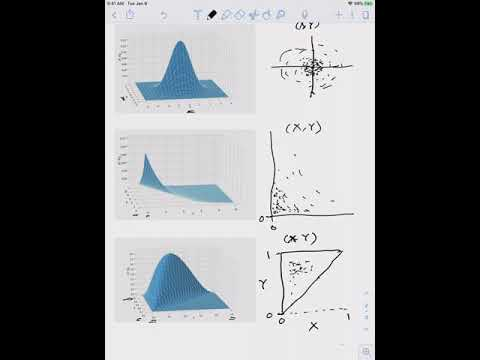

In [2]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('_DzYX2ia_zs')

A function $f$ on the plane is called a *joint density* if:

- $f(x, y) \ge 0$ for all $x$, $y$ 
- $\int_{-\infty}^\infty \int_{-\infty}^\infty f(x, y)dydx = 1$

If you think of $f$ as a surface, then the first condition says that the surface is on or above the plane. The second condition says that the total volume under the surface is $1$.

Think of probabilities as volumes under the surface, and define $f$ to be the *joint density of random variables $X$ and $Y$* if

$$
P((X, Y) \in A) ~ = ~ \mathop{\int \int}_A f(x,y)dydx ~~~~~ \text{for all } A
$$

That is, the chance that the random point $(X, Y)$ falls in the region $A$ is the volume under the joint density surface over the region $A$.

This is a two-dimensional analog of the fact that probabilities involving a single continuous random variable can be thought of as areas under the density curve.

```{admonition} Quick Check
Random variables $X$ and $Y$ have joint density $f$. Pick all the options that are correct about $\int_1^2 \int_3^4 f(x,y)dxdy$.

(i) Could be any non-negative number

(ii) Has to be in $[0, 1]$ (this interval includes both endpoints)

(iii) Has to be in $(0, 1)$ (this interval excludes both endpoints)

(iv) None of the above

```

```{admonition} Answer
:class: dropdown
(ii)

```

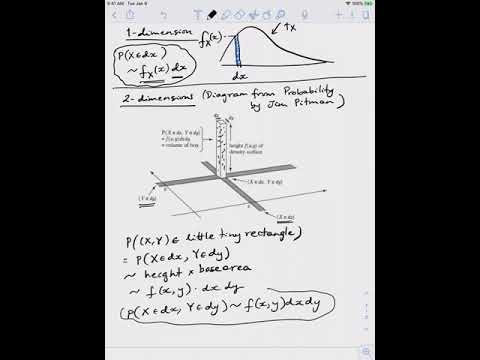

In [3]:
# VIDEO
YouTubeVideo('qfwy23iZBwk')

### Infinitesimals ###
Also analogous is the interpretation of the joint density as part of the calculation of the probability of an infinitesimal region.
![joint density matchstick](jt_density.png)
The infinitesimal region is a tiny rectangle in the plane just around the point $(x, y)$. Its width is $dx$ and its length is $dy$. The corresponding volume is that of a rectangular box whose base is the tiny rectangle and whose height is $f(x, y)$.

Thus for all $x$ and $y$,

$$
P(X \in dx, Y \in dy) ~ \sim ~ f(x, y)dxdy
$$

and the joint density measures *probability per unit area*:

$$
f(x, y) ~ \sim ~ \frac{P(X \in dx, Y \in dy)}{dxdy}
$$

An example will help us visualize all this. Let $f$ be defined as follows:

$$
f(x, y) ~ = ~ 
\begin{cases}
120x(y-x)(1-y), ~~~ 0 < x < y < 1 \\
0 ~~~~~~~~ \text{otherwise}
\end{cases}
$$

For now, just assume that this is a joint density, that is, it integrates to 1. Let's first take a look at what the surface looks like.

### Plotting the Surface ###
To do this, we will use a 3-dimensional plotting routine. First, we define the joint density function. For use in our plotting routine, this function must take $x$ and $y$ as its inputs and return the value $f(x, y)$ as defined above.

In [4]:
def joint(x,y):
    if y < x:
        return 0
    else:
        return 120 * x * (y-x) * (1-y)

Now we will call `Plot_3d` to plot the surface. The arguments are the limits on the $x$ and $y$ axes, the name of the function to be plotted, and two optional arguments `rstride` and `cstride` that determine how many grid lines to use. Larger numbers correspond to less frequent grid lines.

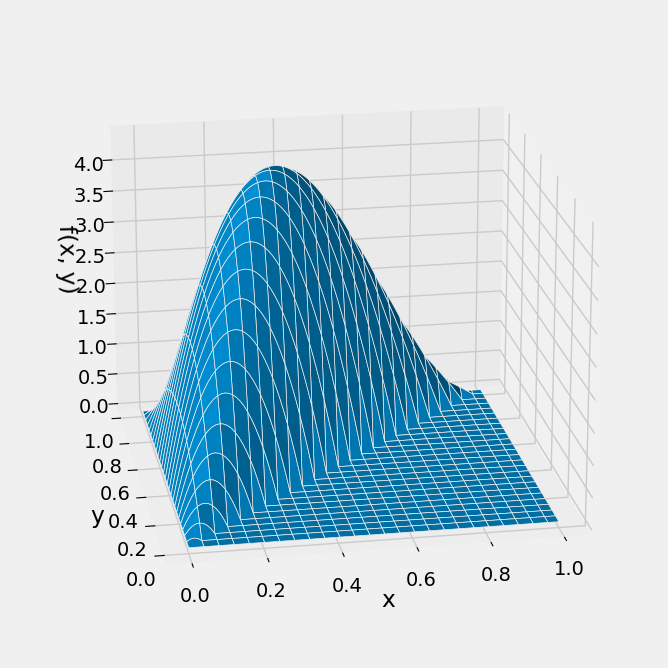

In [5]:
Plot_3d(x_limits=(0,1), y_limits=(0,1), f=joint, cstride=4, rstride=4)

The surface has level 0 in the lower right hand triangle because it is not possible for the point $(X, Y)$ to be in that region.

The possible values of $(X, Y)$ are the blue region shown below. For calculations by hand, we will frequently draw just the possible values and not the surface.

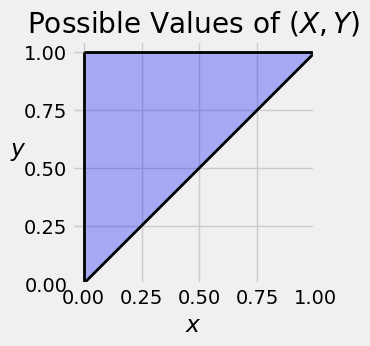

In [6]:
# NO CODE

plt.figure(figsize=(3, 3))
plt.axes().set_aspect('equal')
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0, 1.11, 0.1)
yy = np.ones(len(xx))
plt.fill_between(xx, xx, yy, alpha=0.3, color='blue')
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('Possible Values of $(X, Y)$');

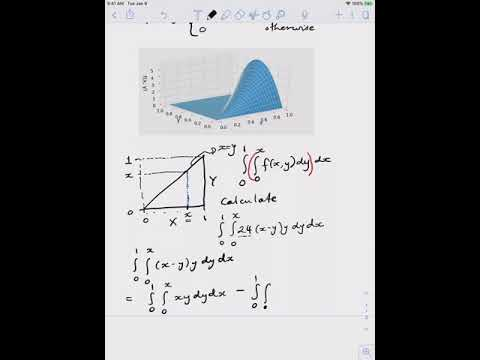

In [7]:
# VIDEO
YouTubeVideo('IP7qhyvy6qE')

### The Total Volume Under the Surface ###
The function $f$ looks like a bit of a mess but it is easy to see that it is non-negative. It's a good idea to check that the total probability under the surface is equal to 1. 

To set up the double integral over the entire region of possible values, notice that for each fixed value of $y$, the value of $x$ goes from 0 to $y$. The values of $y$ go from 0 to 1. 

We will first fix $y$ and integrate with respect to $x$. Then we will integrate with respect to $y$. Thus the total integral is

$$
\begin{align*}
& ~~ \int_0^1 \int_0^y 120x(y-x)(1-y)dxdy \\
&= ~ 120 \int_0^1 (1-y) \Big{(}\int_0^y (xy - x^2)dx\Big{)}dy \\
&= ~ 20 \int_0^1 (1-y)y^3 dy ~ = ~  20 \big{(} \frac{1}{4} - \frac{1}{5}\big{)} ~ = ~  1
\end{align*}
$$

#### By `SymPy` ####
To use `SymPy` we must create two symbolic variables. As our variables are positive, we can specify that as well. Then we can assign the expression that defines the function to the name `f`. This specification doesn't say that $x < y$ but we will enforce that condition when we integrate.

In [8]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

f = 120*x*(y-x)*(1-y)
f

Displaying the double integral requires a call to `Integral` that specifies the inner integral first and then the outer. The call says:

- The function being integrated is $f$.
- The inner integral is over the variable $x$ which goes from $0$ to y.
- The outer integral is over the variable $y$ which goes from 0 to 1.

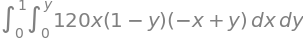

In [9]:
Integral(f, (x, 0, y), (y, 0, 1))

To evaluate the integral, use `doit()`:

In [10]:
Integral(f, (x, 0, y), (y, 0, 1)).doit()

```{admonition} Quick Check
For $f$ the joint density in the example above, integrate $f$ in the other order by replacing each ? with a number.

$$
\text{total volume} ~ = ~ 
\int_?^? \int_?^?
f(x,y)dydx
$$


```

```{admonition} Answer
:class: dropdown
$\int_{0}^{1} \int_{x}^{1}f(x,y)dxdy$

```

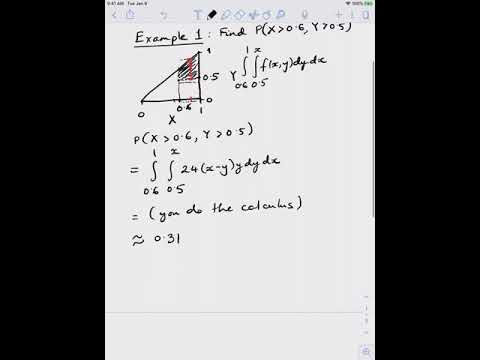

In [11]:
# VIDEO
YouTubeVideo('3Ri-wBDfSMI')

### Probabilities as Volumes ###
Probabilities are volumes under the joint density surface. In other words, they are double integrals of the function $f$. For each probability, we have to first identify the region of integration, which we will do by geometry and by inspecting the event. Once we have set up the integral, we have to calculate its value, which we will do by calculus or `SymPy`.

### Example 1 ###
Suppose you want to find $P(Y > 4X)$. The event is the blue region in the graph below.

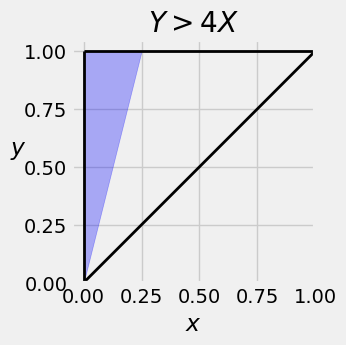

In [12]:
# NO CODE

plt.figure(figsize=(3,3))
plt.axes().set_aspect('equal')
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0, 0.251, 0.05)
yy = np.ones(len(xx))
plt.fill_between(xx, 4*xx, yy, alpha=0.3, color='blue')
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$Y > 4X$');

To find the region of integration, notice that for fixed $y$, the value of $x$ goes from 0 to $y/4$. So 

$$
\begin{align*}
P(Y > 4X) ~ &= ~ \int_0^1 \int_0^{y/4} 120x(y-x)(1-y)dxdy \\
&= ~ 120 \int_0^1 (1-y) \Big{(} \int_0^{y/4} (xy - x^2)dx \Big{)}dy \\
&= ~ 120\Big{(} \frac{1}{32} - \frac{1}{192} \Big{)} \int_0^1 (1-y) y^3dy \\
&= ~ 120\Big{(} \frac{1}{32} - \frac{1}{192}\Big{)} \cdot \frac{1}{20} ~ = ~ 0.15625
\end{align*}
$$

#### By `SymPy` ####

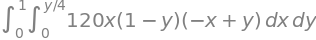

In [13]:
Integral(f, (x, 0, y/4), (y, 0, 1))

In [14]:
Integral(f, (x, 0, y/4), (y, 0, 1)).doit()

In [15]:
5/32

### Example 2 ###
Suppose you want to find $P(X > 0.25, Y > 0.5)$. The event is the colored region below. 

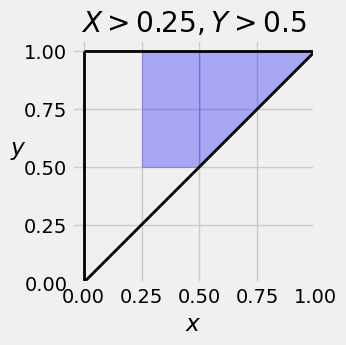

In [16]:
# NO CODE

plt.figure(figsize=(3,3))
plt.axes().set_aspect('equal')
plt.plot([0, 0], [0, 1], color='k', lw=2)
plt.plot([0, 1], [0, 1], color='k', lw=2)
plt.plot([0, 1], [1, 1], color='k', lw=2)
xx = np.arange(0.25, .52, 0.05)
yy1 = 0.5*np.ones(len(xx))
yy2 = np.ones(len(xx))
plt.fill_between(xx, yy1, yy2, alpha=0.3, color='blue')
xx = np.arange(0.5, 1.1, 0.1)
yy1 = 0.5*np.ones(len(xx))
yy2 = np.ones(len(xx))
plt.fill_between(xx, xx, yy2, alpha=0.3, color='blue')
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 1.1, 0.25))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.title('$X > 0.25, Y > 0.5$');

Now $P(X > 0.25, Y > 0.5)$ is the integral of the joint density function over this region. Notice that for each fixed value of $y > 0.5$, the value of $x$ in this event goes from $0.25$ to $y$. So let's integrate $x$ first and then $y$, as we did in the previous calculations.

$$
P(X > 0.25, Y > 0.5) ~ = ~ \int_{0.5}^1 \int_{0.25}^y 120x(y-x)(1-y)dxdy
$$

You can crank that out by hand or use `SymPy`.

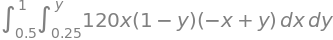

In [17]:
Integral(f, (x, 0.25, y), (y, 0.5, 1))

In [18]:
Integral(f, (x, 0.25, y), (y, 0.5, 1)).doit()

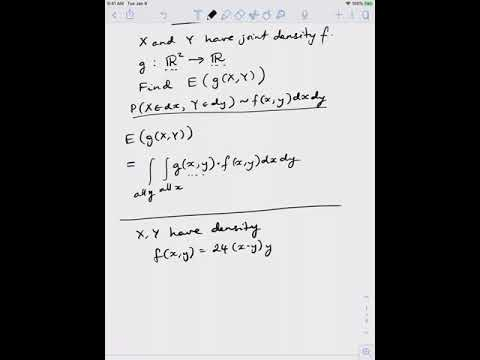

In [19]:
# VIDEO
YouTubeVideo('iWDyZg5Ckfo')

### Expectation ###
Let $g$ be a function on the plane. Then

$$
E(g(X, Y)) ~ = ~ \int_y \int_x g(x, y)f(x, y)dxdy 
$$
provided the integral exists, in which case it can be carried out in either order: $x$ first and then $y$, or the other way around.

This is an application of the non-linear function rule for expectation, applied to two random variables with a joint density.

As an example, let's find $E(\frac{Y}{X})$ for $X$ and $Y$ with the joint density $f$ used in the examples above.

Here $g(x, y) = \frac{y}{x}$, and

$$
\begin{align*}
E\big{(}\frac{Y}{X}\big{)} ~ &= ~ \int_y \int_x g(x, y)f(x, y)dxdy \\ \\
&= ~ \int_0^1 \int_0^y \frac{y}{x} 120x(y-x)(1-y)dx dy \\ \\
&= ~ 120 \int_0^1 y(1-y) \Big{(}\int_0^y (y-x)dx \Big{)}dy \\
&= ~ 60 \int_0^1 y^3(1-y) dy ~ = ~ 60 \cdot \frac{1}{20} ~ = ~ 3
\end{align*}
$$

#### By `SymPy` ####
Remember that `x` and `y` have already been defined as symbolic variables that are positive.

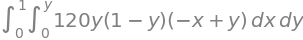

In [20]:
ev_y_over_x = Integral((y/x)*f, (x, 0, y), (y, 0, 1))
ev_y_over_x

In [21]:
ev_y_over_x.doit()